## Модуль «Управляй результатом» исследование пользователей

In [108]:
# --------------------------------------------------
# ST: Start of training: Начало обучения
# ET: End training: Завершение обучения
# Surn: Фамилия
# KRM_stat: Key role of the manager: Курс Ключевая роль руководителя -> Статус
# KRM_perc: Курс Ключевая роль руководителя -> Процент
# PTM_stat: Planning and Time Management: Курс Планирование и тайм-менеджмент -> Статус
# PTM_perc: Курс Планирование и тайм-менеджмент -> Процент
# PB_stat: Petroff Bank: Курс Банк Петрофф -> Статус
# PB_perc: Курс Банк Петрофф -> Процент
# STC_stat:Setting tasks and control: Курс Постановка задач и контроль -> Статус
# STC_perc:Курс Постановка задач и контроль -> Процент
# ImpMRAP_stat: Important Manage the result analysis and planning: Мероприятие Управляй результатом: анализ и планирование -> Статус
# ImpMRAP_start: Мероприятие Управляй результатом: анализ и планирование -> Дата начала
# ImpMRAP_end: Мероприятие Управляй результатом: анализ и планирование -> Дата завершения
# ImpMRAP_reboot: Мероприятие Управляй результатом: анализ и планирование -> Количество переназначений
# LS_mark: Leadership Style: Заданиe Микропрактика "Стиль руководства" -> Балл/Процент
# LS_stat: Заданиe Микропрактика "Стиль руководства" -> Текущий статус задания
# ImpMRSTM_stat: Important Manage the result: setting tasks and monitoring: Мероприятие Управляй результатом: постановка задач и контроль -> Статус
# ImpMRSTM_start: Мероприятие Управляй результатом: постановка задач и контроль -> Дата начала
# ImpMRSTM_end: Мероприятие Управляй результатом: постановка задач и контроль -> Дата завершения
# ImpMRSTM_reboot: Мероприятие Управляй результатом: постановка задач и контроль -> Количество переназначений
# ME_stat: Mastermind with an expert: Мероприятие Мастермайнд с экспертом -> Статус
# ME_start: Мероприятие Мастермайнд с экспертом -> Дата начала
# ME_end: Мероприятие Мастермайнд с экспертом -> Дата завершения
# ME_reboot: Мероприятие Мастермайнд с экспертом -> Количество переназначений
# TP_stat: Training plan: План обучения -> Статус
#
# ----------------------------------------------------------

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

### Data preparation

In [110]:
df = pd.read_excel("Таблица для стажеров_1.xlsx")

arr_name: list = ['ST', 'ET', 'Surn', 'KRM_stat', 'KRM_perc', 'PTM_stat', 'PTM_perc', 'PB_stat', 'PB_perc', 'STC_stat',
                  'STC_perc', 'ImpMRAP_stat', 'ImpMRAP_start', 'ImpMRAP_end', 'ImpMRAP_reboot', 'LS_mark', 'LS_stat',
                  'ImpMRSTM_stat', 'ImpMRSTM_start', 'ImpMRSTM_end', 'ImpMRSTM_reboot', 'ME_stat', 'ME_start', 'ME_end',
                  'ME_reboot', 'TP_stat']
for i in range(len(arr_name)):
    df.rename(columns={df.columns[i]: arr_name[i]}, inplace = True)
# convert ST and ET to datetime type
df[['ST', 'ET']] = df[['ST', 'ET']].astype('datetime64')
df.head()

ST         ET         Surn KRM_stat  KRM_perc    PTM_stat  PTM_perc  \
0 2022-06-01 2022-11-02      Абрамов      NaN       NaN         NaN       NaN   
1 2022-06-01 2022-05-26  Гореленкова      NaN       NaN         NaN       NaN   
2 2022-06-01        NaT       Грачев  Пройден       1.0  В процессе       0.0   
3 2022-06-01 2022-04-22     Полякова      NaN       NaN         NaN       NaN   
4 2022-06-01 2022-04-21   Смоленский      NaN       NaN         NaN       NaN   

    PB_stat  PB_perc  STC_stat  ...     LS_stat ImpMRSTM_stat  \
0       NaN      NaN       NaN  ...         NaN           NaN   
1  Назначен      NaN  Назначен  ...         NaN      Пройдено   
2  Назначен      NaN  Назначен  ...  Выполнение      Пройдено   
3       NaN      NaN       NaN  ...         NaN      Пройдено   
4       NaN      NaN       NaN  ...         NaN      Пройдено   

     ImpMRSTM_start      ImpMRSTM_end  ImpMRSTM_reboot   ME_stat  \
0               NaN               NaN                0       NaN   
1  19.05.2022 10:00  19.05.2022 13:30                0       NaN   
2  17.06.2022 10:00  17.06.2022 13:30                0  Назначен   
3  22.04.2022 10:05  22.04.2022 13:30                0       NaN   
4  21.04.2022 10:00  21.04.2022 13:30                0       NaN   

           ME_start            ME_end ME_reboot              TP_stat  
0               NaN               NaN       NaN             Пройдено  
1               NaN               NaN       0.0             Пройдено  
2  29.06.2022 11:00  29.06.2022 12:30       0.0  В процессе обучения  
3               NaN               NaN       NaN             Пройдено  
4               NaN               NaN       NaN             Пройдено  

[5 rows x 26 columns]

### 1.1. Выясни, какая конверсия до статуса «пройдено» во всем плане обучения за весь 2022 год в цифрах и в процентах. 

In [111]:
# Check if there are null
print("sum of NULL: ",df.isnull().sum())

sum of NULL:  ST                   0
ET                 222
Surn                 0
KRM_stat           460
KRM_perc           460
PTM_stat           531
PTM_perc           531
PB_stat            415
PB_perc            613
STC_stat           498
STC_perc           498
ImpMRAP_stat       176
ImpMRAP_start      191
ImpMRAP_end        191
ImpMRAP_reboot       0
LS_mark            613
LS_stat            526
ImpMRSTM_stat      263
ImpMRSTM_start     266
ImpMRSTM_end       266
ImpMRSTM_reboot      0
ME_stat            564
ME_start           564
ME_end             564
ME_reboot          302
TP_stat              0
dtype: int64


In [112]:
df.groupby('TP_stat').agg('sum')

KRM_perc  PTM_perc  PB_perc  STC_perc  ImpMRAP_reboot  \
TP_stat                                                                      
В процессе обучения      62.0      35.0      0.0      27.0             119   
Не пройдено              10.0       3.0      0.0       1.0              70   
Отменено                  5.0       2.0      0.0       0.0              20   
Пройдено                 16.0      12.0      0.0      15.0              41   

                     LS_mark  ImpMRSTM_reboot  ME_reboot  
TP_stat                                                   
В процессе обучения      0.0               68        0.0  
Не пройдено              0.0               28        0.0  
Отменено                 0.0                6        0.0  
Пройдено                 0.0               44        0.0

In [113]:
df['TP_stat_number'] = [0 if i == 'В процессе обучения' else 1 if i == 'Не пройдено' else 2 if i == 'Отменено' else 3 for i in df['TP_stat']]
df_2 = df[['TP_stat', 'TP_stat_number']].groupby('TP_stat').agg('count')
sum = df_2['TP_stat_number'].sum()
df_2["percent"] = [round(i / sum * 100, 2) for i in df_2['TP_stat_number']]
df_2.reset_index(inplace = True)
df_2.rename(columns = {'TP_stat_number': "TP_stat_count"}, inplace = True)
df_2 = df_2.append({'TP_stat': 'Всего', 'TP_stat_count': sum, 'percent': round(df_2['percent'].sum())}, ignore_index=True)
df_2.head()

TP_stat  TP_stat_count  percent
0  В процессе обучения            222    36.22
1          Не пройдено             47     7.67
2             Отменено             60     9.79
3             Пройдено            284    46.33
4                Всего            613   100.00

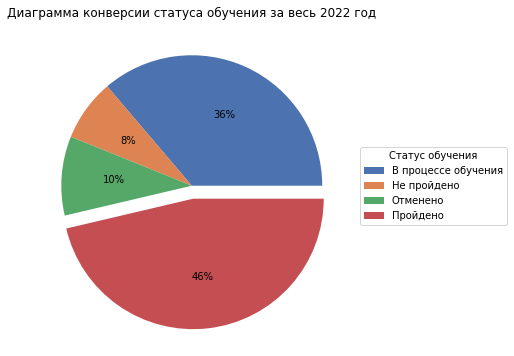

In [114]:
explode = [0, 0, 0, 0.1]
fig, ax = plt.subplots(figsize = (12, 6))
pallete_color = sns.color_palette("deep")
plt.pie(df_2[df_2['TP_stat'] != 'Всего']['percent'], colors = pallete_color, explode=explode, autopct='%.0f%%')
ax.legend(df_2['TP_stat'],
          title="Статус обучения",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Диаграмма конверсии статуса обучения за весь 2022 год");

### 1.2. Сколько людей «отвалились» из процесса обучения в мае, в июне и находятся до сих пор в процессе обучения.

In [115]:
# filter may and june how don't past and cancle. Plus how is studing yet.
df_3 = df[((df['ET'] >= '2022-05-01') & (df['ET'] < '2022-06-30') & ((df['TP_stat_number'] == 1) | (df['TP_stat_number'] == 2)))
          | (df['TP_stat_number'] == 0)]
df_3.head()

ST  ET        Surn    KRM_stat  KRM_perc    PTM_stat  PTM_perc  \
2  2022-06-01 NaT      Грачев     Пройден       1.0  В процессе       0.0   
5  2022-06-01 NaT  Тамбовцева  В процессе       0.0         NaN       NaN   
10 2022-01-17 NaT       Львов     Пройден       1.0     Пройден       1.0   
14 2022-01-21 NaT     Арестов    Назначен       0.0         NaN       NaN   
19 2022-01-24 NaT    Максимов     Пройден       1.0    Назначен       0.0   

     PB_stat  PB_perc  STC_stat  ...  ImpMRSTM_stat    ImpMRSTM_start  \
2   Назначен      NaN  Назначен  ...       Пройдено  17.06.2022 10:00   
5    Пройден      NaN  Назначен  ...       Пройдено  16.06.2022 10:00   
10   Пройден      NaN   Пройден  ...       Пройдено  16.06.2022 10:00   
14  Назначен      NaN       NaN  ...            NaN               NaN   
19  Назначен      NaN       NaN  ...            NaN               NaN   

        ImpMRSTM_end ImpMRSTM_reboot   ME_stat          ME_start  \
2   17.06.2022 13:30               0  Назначен  29.06.2022 11:00   
5   16.06.2022 13:33               1  Назначен  29.06.2022 11:00   
10  16.06.2022 13:30               0  Назначен  29.06.2022 11:00   
14               NaN               0       NaN               NaN   
19               NaN               0       NaN               NaN   

              ME_end ME_reboot              TP_stat TP_stat_number  
2   29.06.2022 12:30       0.0  В процессе обучения              0  
5   29.06.2022 12:30       0.0  В процессе обучения              0  
10  29.06.2022 12:30       0.0  В процессе обучения              0  
14               NaN       0.0  В процессе обучения              0  
19               NaN       0.0  В процессе обучения              0  

[5 rows x 27 columns]

In [116]:
# Create table from filtered table
df_3 = df_3[['TP_stat', 'TP_stat_number']].groupby('TP_stat').agg('count')
sum = df_3['TP_stat_number'].sum()
df_3["percent"] = [round(i / sum * 100, 2) for i in df_3['TP_stat_number']]
df_3.reset_index(inplace = True)
df_3.rename(columns = {'TP_stat_number': "TP_stat_count"}, inplace = True)
df_3 = df_3.append({'TP_stat': 'Всего', 'TP_stat_count': sum, 'percent': round(df_3['percent'].sum())}, ignore_index=True)
df_3.head()

TP_stat  TP_stat_count  percent
0  В процессе обучения            222    89.16
1          Не пройдено              7     2.81
2             Отменено             20     8.03
3                Всего            249   100.00

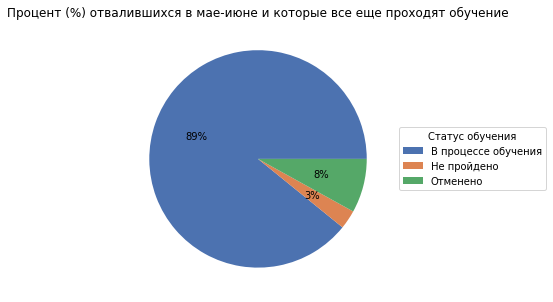

In [117]:
explode = [0, 0, 0]
fig, ax = plt.subplots(figsize = (10, 5))
pallete_color = sns.color_palette("deep")
plt.pie(df_3[df_3['TP_stat'] != 'Всего']['percent'], colors = pallete_color, explode=explode, autopct='%.0f%%')
ax.legend(df_2['TP_stat'],
          title="Статус обучения",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Процент (%) отвалившихся в мае-июне и которые все еще проходят обучение");

Text(0, 0.5, 'Количество, чел.')

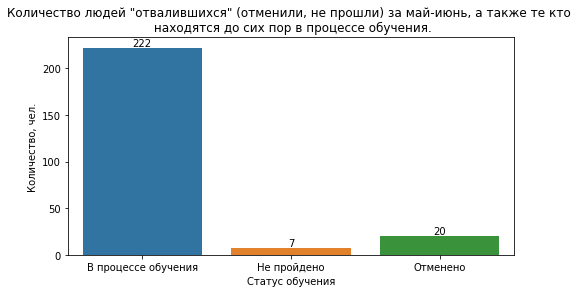

In [118]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.barplot(data = df_3[df_3['TP_stat'] != "Всего"], x = 'TP_stat', y = 'TP_stat_count', ax = ax)
ax.bar_label(ax.containers[0])
ax.set_title('Количество людей "отвалившихся" (отменили, не прошли) за май-июнь, а также те кто \n находятся до сих пор в процессе обучения.');
ax.set_xlabel("Статус обучения")
ax.set_ylabel("Количество, чел.")

### 1.3. Определи, какой процент людей использовали как минимум еще одну попытку прохождения первого и второго обязательного мероприятий. А какой процент тех, кто использовал 2 попытки.

In [119]:
"""
group_1:   те, кто хотябы раз воспользовался еще одной попыткой (1 и более) для прохождения первого и второго обязательного мероприятий вместе взятых.
group_1.1: group_1 - group_1.2: использовали только одну попытку для прохождения первого и второго обязательного мероприятий вместе взятых.
           данная группа состоит в 1-ой группе.
group_1.2: те, кто использовал две попытки для прохождения первого и второго обязательного мероприятий вместе взятых.
           данная группа состоит в 1-ой группе.
group_2:   те, кто все еще не использовал ни одну попытку для прохождения первого и второго обязательного мероприятий вместе взятых.
"""
all_members = df['ImpMRSTM_reboot'].count()
group_1 = df[((df["ImpMRSTM_reboot"] > 0) | (df["ImpMRAP_reboot"] > 0))]['ImpMRSTM_reboot'].count()
group_1_2 = df[((df["ImpMRSTM_reboot"] > 1) | (df["ImpMRAP_reboot"] > 1))]['ImpMRSTM_reboot'].count()
group_2 = all_members - group_1

percent_group = [round((group_1-group_1_2)/all_members*100), round(group_1_2/all_members*100), 
                 round(group_2/all_members*100), round((group_1)/all_members*100)]
print(percent_group[0])
print(all_members, group_1, group_2, group_1_2)

17
613 234 379 129


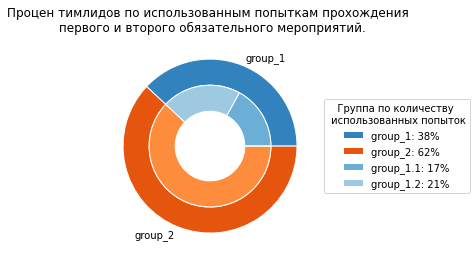

In [120]:
fig, ax = plt.subplots(figsize = (8, 4))

size = 0.3
vals = np.array([[percent_group[0], percent_group[1]], [percent_group[2], 0.]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), labels = ['group_1', 'group_2'], radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.legend(["group_1: " + str(percent_group[3]) + '%', "group_2: "  + str(percent_group[2]) + '%', "group_1.1: " + str(percent_group[0]) + '%',
           "group_1.2: " + str(percent_group[1]) + '%'],
          title="   Группа по количеству \n использованных попыток",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set(aspect="equal", title='Процен тимлидов по использованным попыткам прохождения \n первого и второго обязательного мероприятий.')
plt.show()

### 1.4. Определи, какое количество и процент от общего числа людей вообще не завершило план.

In [121]:
# Так как говрится "вообще", значит ни в одном из двух курсов нет статуса "Пройдено". Т.е. мы не берем даже тех, кто прошел
# один важный курс.
df_4 = df[(df['ImpMRSTM_stat'] != 'Пройдено') & ((df['TP_stat'] == 'Не пройдено') | (df['TP_stat'] == 'Отменено')) &
          (df['ImpMRAP_stat'] != 'Пройдено')]
all_members = df['Surn'].count()
total_fail = df_4['Surn'].count()
print(str(total_fail), 'чел.: количество обучающихся от общего числа людей вообще не завершили план.')
print(str(round(total_fail/all_members*100, 2)), '%: процент обучающихся от общего числа людей вообще не завершили план.')
# df_4.shape[0]

88 чел.: количество обучающихся от общего числа людей вообще не завершили план.
14.36 %: процент обучающихся от общего числа людей вообще не завершили план.


### 2. Ты нашел тех, кто не с первого раза проходил/проходит обучение, и кто совсем отвалился с обучения. Необходимо исследовать причины недохождения до конца/отваливания из модуля. Кого бы ты исследовал(а) и по какому признаку?  Расскажи, какой метод исследования выберешь для этого, и какая структура исследования будет: вопросы, время, количество людей.

Рассуждение вводное:

По данным также можно попробывать разделить на пол. Также те, кто зафейлил, можно посмотреть когда они начали обучение.
Если будет тенденция такова, что тимлиды начинают обучение весной и брасают весной. То в теории весной лучше не проводить интенсивы.Так как продуктивность падает из-за ослабленности огранизма, авитаминоза. Но это не главное. Так как у нас обучаются тимлиды,то с дисциплиной должно быть все в порядке поидеи, но это не точно. Вообщем, у нас обучаются целеустремленные люди, которые знают что хотят от жизни. Значит в теории они осознанно брали обучение. Вот только не понятно обязательные мероприятия - это мероприятия совершаемые принудительно по чьему-то приказу или по инициативе самого тимлида. Основная задача повысить конверсию прохождения модулей. В первую очередь необходимо обратить внимание на сам курс. И посмотреть в каком модуле больше всего отпадают обучающиеся. Возможно дело в контенте. Возможно вопросы на экзамене не были рассмотрены на самой лекции. 

1. Кого бы ты исследовал и по какому признаку:
<p>Первое что приходит на ум это взять не только тех, кто не дошел, но и тех, кто прошли. Далле необходимо понят как долго обучающийся взаимодействовал с курсом. Посмотреть брали ли дополнительные курсы. Сколько баллов получили за экзамен. И потом сравнить отличаются ли показатели кто завершил курс и те, кто не завершил курс. Далле выбрать взять отфильтровать выборку. Не берем тех, кто мало проводил время на курсе. Также не берем кто сдал и в тоже время очень мало взаимодействовал с курсом. Но возьмем очень важных людей для исследования тех, кто много времени уделял курсу, но все равно не сдали. Назовем их группой "A". И возьмем тех кто сдал и достаточно времени взаимодействовал с курсом. Назовем их группой "B".

 
2. Расскажи, какой метод исследования выберешь для этого, и какая структура исследования будет:
<p>По идеи если мы говорим про онлайн обучение, то в каждом модуле после окончания лекции должны стоять "мини-опросники": Оцените лекцию от 1 до 5 и возможность оставить комментарий. Это очень удобно, так как занимает очень мало времени у пользователя.
<p> - Понять в какой части модуля больше всего идет просадка (слив участников).
<p> - Первых опросить группу "A".
<p> - Вторых опросить группу "В" по частям курса, которая указала группа "А". Это сделано, чтобы уменьшить размер анкеты. Так как группа "B" менее заинтересована отвечать на анкету, но с более холодной головой оценивает курс, чем группа "B".

    
3. Вопросы к анкете:
<p> - Если бы вы могли изменить одну конкретную вещь, что бы это было?
<p> - Как бы вы оценили курс с точки зрения структуры (логичный, простой, запутанный)?
<p> - Как бы вы оценили качество визуальных эффектов (изображений, видео)?

### 3. 3.	Напиши небольшой шаблон письма этим людям, которых ты будешь исследовать: с актуализацией темы, о самом исследовании из 2 пункта и что потребуется сделать участнику для прохождения исследования в выбранном тобой формате. 

Возможно я не прав. Но кажется, что на письмо по прохождению анкеты мало кто отвечает. Особенно если это рассылка. Поэтому это пиьсмо должно быть уникально. Было бы круто если письмо приходило пользователю не в раздел рассылки а во входящие, чтобы данное письмо не утонуло в море рассылок. И перед тем как приглашать пройти опрос, было бы круто предложить пользователю что-то взамен.  Например, купон в Читай-город или кафейню. Или очень любопытные, свежие факты. Также в письмо не должно быть больше 80-100 слов. Кратко по существу.


Наприме,

Здравствуйте!
Мы очень рады, что вы приняли участие в мероприятии "Школы управленца". Будем несметно благодарны, если вы пройдете опрос о нашем курсе «Управляй результатом». Это займет не более 127 секунд. Как в одном фильме. :)


Заполняй опрос и забирай подарки — промокод на скидку 15% на покупки в Читай-город, промокод на скидку 35% на любое кофе из кофейни "ASD".
 

С уважением,

команда Tinkoff


<<<<<Пройти опрос >>>>>



#### Дополнительное исследование

In [122]:
w_list: list = []
for i in df_4['Surn']:
    result = re.search(r"(а$|ая$)", i)
    if result:
        w_list.append(i)

In [123]:
print(w_list)

['Журавлева', 'Сафронова', 'Камалина', 'Болотаева', 'Резенькова', 'Симонова', 'Маначкина', 'Алексеева', 'Васягина', 'Дьякова', 'Кленова', 'Кутнякова', 'Легета', 'Силаева', 'Судина', 'Хмелькова', 'Храмцова', 'Потапова', 'Захарова', 'Ильина', 'Ильина', 'Афанасьева', 'Афанасьева', 'Кулешова', 'Нагаева', 'Некрещеная', 'Пузина', 'Волкова', 'Кузнецова', 'Худоярова']


In [124]:
df_5 = df_4
for i in w_list:
    df_5 = df_5[df_5['Surn'] != i]
df_5["Surn"].count()
print("Из", str(total_fail), 'пользователей, кто вообще не завершили план:')
print("\t- ", str(total_fail - df_5["Surn"].count()), 'жен.;')
print("\t- ", str(df_5["Surn"].count()), 'муж.;')

Из 88 пользователей, кто вообще не завершили план:
	-  30 жен.;
	-  58 муж.;


In [125]:
# df.groupby('ST').Surn.nunique().plot()
# plt.title("Количество пользователей по периодам, \n когда они начали обучение.");

In [126]:
# df[(df["TP_stat"] != "Пройдено") & (df["TP_stat"] != "В процессе обучения")].groupby('ET').Surn.nunique().plot()
# plt.title("Количество пользователей (не сдавшие, отменившие курс)\n по периодам, когда они прекратили обучение.");